In [95]:
# !pip install voila

<center><img src="formula-1-logo-5-3.png" width="400"/></center>

 <center><img src="keyart_crushed.png"  width="500"/></center>

In [96]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

import folium
import folium.plugins as plg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

data_path = "./data"

In [97]:
# List all available data files
# for file in os.listdir(data_path):
#     print(file)

In [98]:
# Dataset Exploration
# List all the columns in each file

files_and_columns = {}
for file in os.listdir(data_path):
    df = pd.read_csv(os.path.join(data_path, file))
    files_and_columns[file] = list(df.columns)

In [99]:
df_status = pd.read_csv(os.path.join(data_path, "status.csv"))
df_laptimes = pd.read_csv(os.path.join(data_path, "lap_times.csv"))
df_drivers = pd.read_csv(os.path.join(data_path, "drivers.csv"))
df_races = pd.read_csv(os.path.join(data_path, "races.csv"))
df_standings = pd.read_csv(os.path.join(data_path, "driver_standings.csv"))
df_circuits = pd.read_csv(os.path.join(data_path, "circuits.csv"))

In [100]:
# make a column with driver full name (merge first and last name)
df_drivers["full_name"] = ""

for i in df_drivers.index:
    df_drivers.loc[i, "full_name"] =  df_drivers.loc[i, "forename"] + " " + df_drivers.loc[i, "surname"]

In [101]:
# merge full name with lap times according to driver id
df_drivernames = df_drivers[["driverId", "full_name"]]
df_laptimes = df_laptimes.merge(df_drivernames, on="driverId")

In [102]:
# merge race names with lap times according to race id
df_laptimes = df_laptimes.merge(df_races[["raceId", "name", "year"]], on="raceId")

In [103]:
# make ipywidgets - select year, race and driver
#using ipywidgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [104]:
df_races_copy = df_races.merge(df_circuits[["circuitId", "name", "location", "country", "lat", "lng"]], on="circuitId")
df_races_copy.rename(columns={'name_y': "circuit_name", "name_x": "race_name"}, inplace=True)

<center><span style="font-family:verdana; font-size:25px">Where are the races held?</span></center>

<p><center><span style="font-family:georgia; font-size:15px">Select a year and see where races were held that year! Hover over the pins for more information. </span></center></p>


In [105]:
@widgets.interact(Year = df_races_copy['year'].sort_values().unique())
def choose_year(Year):
    df_races_year = df_races_copy[df_races_copy['year'] == Year]
    
    circuits_map = folium.Map(zoom_start=13)
    map_cluster = plg.MarkerCluster().add_to(circuits_map)
    for idx, row in df_races_year.iterrows():
        folium.Marker(
            location=[row['lat'], row['lng']],
            icon=folium.Icon(color='cadetblue', prefix='fa'),
            tooltip=["Circuit Name: ", row['circuit_name'], "\nRace date: ", row['date'], "\nLocation: ", row['location'], 
                     "\nCountry", row['country']]
            ).add_to(map_cluster)

    display(circuits_map)

interactive(children=(Dropdown(description='Year', options=(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 19…

<center><span style="font-family:verdana; font-size:25px">Race Statistics</span></center>

<p><center><span style="font-family:georgia; font-size:15px">In any F1 race, lap times and position in the race are really important. The faster you go, the more positions you gain. </span></center></p>

<p><center><span style="font-family:georgia; font-size:15px">The first graph gives us a trend of lap times as the laps progress in a race and the second graph gives us a trend of position in the race as the laps progress</span></center></p>

<p><center><span style="font-family:georgia; font-size:15px">Select a year, the race and the driver you want to see lap times for!</span></center></p>


In [106]:
#df_races = pd.read_csv(os.path.join(data_path, "races.csv"))

In [107]:
# select race
def select_race(df_year, race, driver):
    df_race_year = df_year[df_year['name'] == race]
    df_race_year_driver = df_race_year[df_race_year['full_name'] == driver]
    
    df_race_year_driver["timestamp"] = df_race_year_driver["time"].apply(lambda x: datetime.strptime(x, '%M:%S.%f'))
    fig, axs = plt.subplots(2,1)
    axs[0].plot(df_race_year_driver["lap"], df_race_year_driver["timestamp"])
    axs[0].set_xlabel("LAP NUMBER")
    axs[0].set_ylabel("LAP TIME")
    axs[1].plot(df_race_year_driver["lap"], df_race_year_driver["position"])
    axs[1].set_xlabel("LAP NUMBER")
    axs[1].set_ylabel("POSITION");

In [108]:
@widgets.interact(Year = df_laptimes['year'].sort_values().unique())
def choose_year(Year):
    df_laptimes_year = df_laptimes[df_laptimes['year'] == Year]
    
    # select race
    df_race_year = interactive(select_race, df_year = fixed(df_laptimes_year), race=df_laptimes_year['name'].unique(),
                              driver=df_laptimes_year['full_name'].unique())
    display(df_race_year)

interactive(children=(Dropdown(description='Year', options=(1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 20…

In [109]:
# this merging gives us a dataset with info about the driver (name), race (name) and the points scored 
df_standings = df_standings.merge(df_drivernames, on="driverId")
df_standings = df_standings.merge(df_races[["raceId", "name", "year"]], on="raceId")

<center><span style="font-family:verdana; font-size:25px">Driver Statistics</span></center>

<p><center><span style="font-family:georgia; font-size:15px">Want to see how your favorite driver has performed during a given season?</span></center></p>

<p><center><span style="font-family:georgia; font-size:15px">Select a year and a driver of your choice to see how they did!</span></center></p>

<p><center><span style="font-family:georgia; font-size:15px">The graph gives us the trend of how the driver performed during a given season - did they go up the points board or did they not do so well? </span></center></p>




In [110]:
global year
def select_racer(df_standings_year, racer):
    df_racer_year = df_standings_year[df_standings_year['full_name']==racer]
    
    df_racer_year.sort_values(by="raceId", inplace=True)
    
    global year 
    
    fig, ax = plt.subplots(dpi=100)
    ax.plot(df_racer_year['raceId'], df_racer_year['points'])
    ax.set_xticks(df_racer_year['raceId'])
    ax.set_xticklabels(df_racer_year['name'], rotation=90);
    ax.set_xlabel("Race Name")
    ax.set_ylabel("Season Points");
    ax.set_title("{} Season Progress- {}".format(str(year), racer));

In [111]:
# making ipywidgets
@widgets.interact(Year = df_standings['year'].sort_values().unique())
def choose_year(Year):
    df_standings_year = df_standings[df_standings['year'] == Year]
    
    global year
    year = Year
    # select racer
    df_racer_year = interactive(select_racer, df_standings_year = fixed(df_standings_year), racer=df_standings_year['full_name'].unique())    
    display(df_racer_year)

interactive(children=(Dropdown(description='Year', options=(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 19…

<center><span style="font-family:verdana; font-size:25px">Comparing Driver Performance</span></center>

<p><center><span style="font-family:georgia; font-size:15px">F1 points battles between drivers is something that could get exciting! </span></center></p>

<p><center><span style="font-family:georgia; font-size:15px">Select a year and a two drivers you wish to compare!</span></center></p>

<p><center><span style="font-family:georgia; font-size:15px">This graph compares the performance (here, the points gained during a given season) of two drivers. This gives us an overall view of driver performance and tells us who's doing better. </span></center></p>






In [112]:
def plot_versus(df_standings_year, driver_1, driver_2):
    
    df_standings_d1 = df_standings_year[df_standings_year['full_name'] == driver_1]
    df_standings_d2 = df_standings_year[df_standings_year['full_name'] == driver_2]
    
    df_standings_d1.sort_values('raceId', inplace=True)
    df_standings_d2.sort_values('raceId', inplace=True)
    
    fig, ax = plt.subplots(dpi=100)
    ax.plot(df_standings_d1['raceId'], df_standings_d1['points'], label=driver_1)
    ax.plot(df_standings_d2['raceId'], df_standings_d2['points'], label=driver_2)
    ax.set_xticks(df_standings_d1['raceId'])
    ax.set_xticklabels(df_standings_d1['name'], rotation=90)
    ax.legend()
    ax.set_xlabel("Race Name")
    ax.set_ylabel("Season Points");

In [113]:
@widgets.interact(Year = df_standings['year'].sort_values().unique())
def choose_year(Year):
    df_standings_year = df_standings[df_standings['year'] == Year]
            
    drivers = interactive(plot_versus, df_standings_year=fixed(df_standings_year),
                         driver_1=df_standings_year['full_name'].unique(),
                         driver_2 = df_standings_year['full_name'].unique())
    display(drivers)

interactive(children=(Dropdown(description='Year', options=(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 19…

In [114]:
df_constructors = pd.read_csv(os.path.join(data_path, "constructors.csv"))
df_results = pd.read_csv(os.path.join(data_path, "results.csv"))

In [115]:
df_results = df_results.merge(df_constructors[['constructorId', 'name']], on='constructorId') #constructors==teams
df_results = df_results.merge(df_drivers[["driverId", "full_name"]], on="driverId") #associates driver id with a name
df_results = df_results.merge(df_races[["raceId", "name", "year"]], on="raceId") # associates raceId with a race name and year
df_results.rename(columns={"name_x": "constructor_name", "name_y": "race_name"}, inplace=True)

In [116]:
for i in df_results.index:
    if df_results.loc[i]["race_name"] == "Qatar Grand Prix" and df_results.loc[i]["year"] == 2021:
        df_results.loc[i, "raceId"] = 1072

In [117]:
def plot_drivers(df_results_year, team):
    
    df_results_team = df_results_year[df_results_year['constructor_name'] == team]

    
    df_results_team = df_results_team.merge(df_standings[['raceId', 'driverId', 'points', 'year']], on=['raceId', 'driverId', 'year'])
    df_results_team.rename(columns={'points_x': 'race_points', 'points_y': 'total_points'}, inplace=True)
    
    
    df_results_team.sort_values(by='raceId')
    
    fig, ax = plt.subplots(dpi=100)
    for driver in df_results_team['full_name'].unique():
        df_driver_team = df_results_team[df_results_team['full_name'] == driver]
        df_driver_team.sort_values(by="raceId")
        ax.plot(df_driver_team['raceId'], df_driver_team['total_points'], label=driver)

    ax.set_xticks(df_results_team['raceId'])
    ax.set_xticklabels(df_results_team['race_name'], rotation=90);
    ax.set_xlabel("Race Name")
    ax.set_ylabel("Season Points")
    ax.legend()
    # ax.set_title("2020 Season Progress- McLaren Drivers");

<center><span style="font-family:verdana; font-size:25px">Comparings Drivers In The Same Team</span></center>

<p><center><span style="font-family:georgia; font-size:15px">Let's say you have a favorite team, and you want to know which of the two drivers is performing better. Find out here! </span></center></p>

<p><center><span style="font-family:georgia; font-size:15px">Select a year and the team of your choice! </span></center></p>

<p><center><span style="font-family:georgia; font-size:15px">This graph compares the performance (here, the points gained during a given season) of two drivers in the same team. This gives us an overview of who's scoring more points for the team - crucial in deciding who stays and who leaves the next season. </span></center></p>

In [118]:
@widgets.interact(Year = df_results['year'].sort_values(ascending=False).unique())
def choose_year(Year):
    df_results_year = df_results[df_results['year'] == Year]
            
    drivers = interactive(plot_drivers, df_results_year=fixed(df_results_year),
                            team = df_results_year['constructor_name'].unique())
    display(drivers)

interactive(children=(Dropdown(description='Year', options=(2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 20…

In [119]:
# analyzing the constructors results
df_constructors_result = pd.read_csv(os.path.join(data_path, "constructor_results.csv"))
df_constructors_standing = pd.read_csv(os.path.join(data_path, "constructor_standings.csv"))

In [120]:
# use constructor standing
# merge race name, constructor(team) name
df_constructors_result = df_constructors_result.merge(df_constructors[['constructorId', 'name']], on='constructorId')
df_constructors_result = df_constructors_result.merge(df_races[["raceId", "name", "year"]], on="raceId")

In [121]:
df_constructors_result.rename(columns={"name_x": "constructor_name", "name_y": "race_name"}, inplace=True)

In [122]:
def plot_teams(df_constructors_results_years, team):
    df_team = df_constructors_results_years[df_constructors_results_years['constructor_name'] == team]
    
    df_team = df_team.groupby("year")["points"].sum()
    
    year = []
    points = []
    for k, v in df_team.items():
        year.append(k)
        points.append(v)
        
    plt.bar(year, points)
    # plt.title("Ferrari's Performance 2016-2021")
    plt.xlabel("Year")
    plt.ylabel("Constructor Points")
    plt.xticks(year)

<center><span style="font-family:verdana; font-size:25px">Team Performance</span></center>

<p><center><span style="font-family:georgia; font-size:15px">Want to see how your favorite team has been performing over the last few years?</span></center></p>

<p><center><span style="font-family:georgia; font-size:15px">Select the start and end year, and the team of your choice! </span></center></p>

<p><center><span style="font-family:georgia; font-size:15px">This graph gives us a trend of how a team has been performing given a range. This can help in giving potential information about team improvement - maybe they made their cars faster over a few years! </span></center></p>

In [123]:
@widgets.interact(year_1 = df_constructors_result['year'].sort_values().unique(),
                 year_2 = df_constructors_result['year'].sort_values().unique())
def choose_year(year_1, year_2):
    
    df_constructors_results_years = df_constructors_result[df_constructors_result['year'].isin(list(range(year_1, year_2+1)))]
    
            
    team = interactive(plot_teams, df_constructors_results_years=fixed(df_constructors_results_years),
                            team = df_constructors_results_years['constructor_name'].unique())
    display(team)

interactive(children=(Dropdown(description='year_1', options=(1956, 1958, 1959, 1960, 1961, 1962, 1963, 1964, …

In [124]:
# exploring qualifying.csv and pit_stops.csv
df_qualifying = pd.read_csv(os.path.join(data_path, "qualifying.csv"))
df_pit_stops = pd.read_csv(os.path.join(data_path, "pit_stops.csv")) 

In [125]:
df_qualifying = df_qualifying.merge(df_races[["raceId", "name", "year"]], on="raceId")
df_qualifying = df_qualifying.merge(df_drivers[["driverId", "full_name"]], on="driverId")

In [126]:
#df_qualifying = df_qualifying.replace(r'\\N', "0" , regex=True)

In [127]:
df_qualifying['q1'] = df_qualifying['q1'].replace(r'\\N', "0:0.0" , regex=True)
df_qualifying['q2'] = df_qualifying['q2'].replace(r'\\N', "0:0.0" , regex=True)
df_qualifying['q3'] = df_qualifying['q3'].replace(r'\\N', "0:0.0" , regex=True)

In [128]:
def plot_quals(df_qualifying_years, driver, race):
    
    df_qualifying_race = df_qualifying_years[df_qualifying_years['name'] == race]
    df_qualifying_driver = df_qualifying_race[df_qualifying_race['full_name'] == driver]

    df_qualifying_driver['q1'] = df_qualifying_driver['q1'].apply(lambda x: datetime.strptime(x, '%M:%S.%f'))
    df_qualifying_driver['q2'] = df_qualifying_driver['q2'].apply(lambda x: datetime.strptime(x, '%M:%S.%f'))
    df_qualifying_driver['q3'] = df_qualifying_driver['q3'].apply(lambda x: datetime.strptime(x, '%M:%S.%f'))
    
    # create bar chart
    fig, ax = plt.subplots(dpi=100)
    ax.plot(df_qualifying_driver['year'], df_qualifying_driver['q1'], label='q1')
    ax.plot(df_qualifying_driver['year'], df_qualifying_driver['q2'], label='q2')
    ax.plot(df_qualifying_driver['year'], df_qualifying_driver['q3'], label='q3')
    ax.set_xticks(df_qualifying_driver['year']);
    ax.set_xlabel("Year")
    ax.set_ylabel("Lap Times HH:MM:SS")
    # ax.set_title("Lewis Hamilton: Qualifying Lap Times at the Australian Grand Prix")
    ax.legend();

<center><span style="font-family:verdana; font-size:25px">Qualifying Lap Time</span></center>

<p><center><span style="font-family:georgia; font-size:15px">In every race (a Grand Prix) there are 4 sessions - Qualifying 1, 2, 3 and the main race. The drivers' position on the grid for the main race is decided by the lap times during the qualifying sessions. The driver who goes fastest is first on the grid, and so on. </span></center></p>

<p><center><span style="font-family:georgia; font-size:15px">Select the start and end year, the driver, and the grand prix choice! </span></center></p>

<p><center><span style="font-family:georgia; font-size:15px">This graph helps us visualize how the lap times during the qualifying sessions for a given circuit varied over time. If the lap times reduce over the years, we could say that the car has become faster and if the lap times increase we can say the car has slowed down.. </span></center></p>

In [129]:
@widgets.interact(year_1 = df_qualifying['year'].sort_values().unique(),
                 year_2 = df_qualifying['year'].sort_values().unique())
def choose_year(year_1, year_2):
    
    df_qualifying_years = df_qualifying[df_qualifying['year'].isin(list(range(year_1, year_2+1)))]
    
            
    team = interactive(plot_quals, df_qualifying_years=fixed(df_qualifying_years),
                            driver = df_qualifying_years['full_name'].unique(),
                              race = df_qualifying_years['name'].unique())
    display(team)

interactive(children=(Dropdown(description='year_1', options=(1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, …

<center><span style="font-family:verdana; font-size:25px">Who's the best driver of all time?</span></center>

<p><center><span style="font-family:georgia; font-size:15px">Let's take a look at who's been winning the most in ALL of Formula 1!</span></center></p>

<p><center><span style="font-family:georgia; font-size:15px">The current champion is Lewis Hamilton! He was able to surpass Michael Schumachers' record of 91 wins during his career!</span></center></p>

<p><center><span style="font-family:georgia; font-size:14px">This graph gives us an overview of who's the best driver in all of Formula 1, based on the number of times they've finished a Grand Prix in first place! </span></center></p>

In [130]:
df_wins = pd.DataFrame(columns=['full_name', 'wins'])

In [131]:
for name in df_standings['full_name'].unique():
    total_wins = df_standings[df_standings['full_name'] == name].groupby("year")["wins"].max().sum()
    to_add = {'full_name': name, 'wins': total_wins}
    
    df_wins = df_wins.append(to_add, ignore_index=True)

In [132]:
df_wins.sort_values(by="wins", ascending=False, inplace=True)
df_wins = df_wins[df_wins['wins'] > 2]

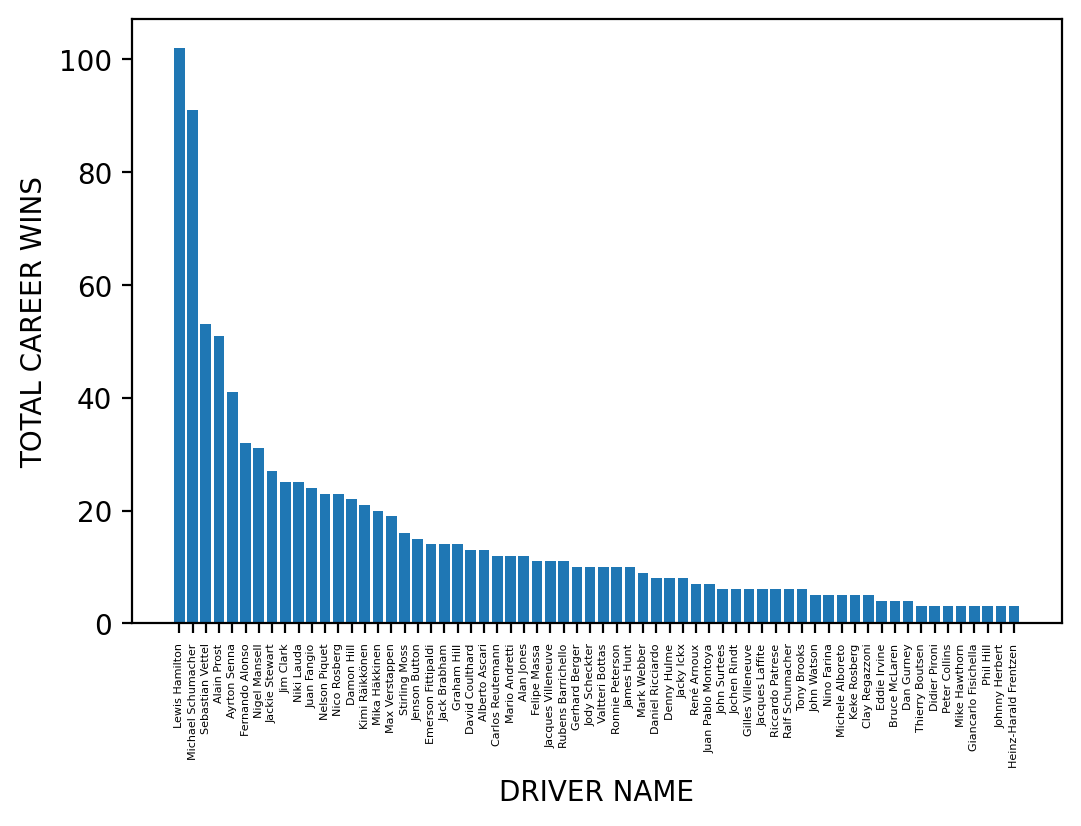

In [133]:
fig, ax = plt.subplots(dpi=200)
ax.bar(df_wins['full_name'].values, df_wins['wins'].values)
ax.set_xticklabels(df_wins['full_name'], rotation=90, fontsize=4)
ax.set_xlabel("DRIVER NAME")
ax.set_ylabel("TOTAL CAREER WINS");
#ax.set_title("CAREER WINS (for drivers with more than 2 wins)");

In [134]:
# constructor wins
df_constructors_standing = pd.read_csv(os.path.join(data_path, "constructor_standings.csv"))
df_constructors_standing = df_constructors_standing.merge(df_constructors[['constructorId', 'name']], on='constructorId')
df_constructors_standing = df_constructors_standing.merge(df_races[["raceId", "name", "year"]], on="raceId")

In [135]:
df_constructors_standing.rename(columns={"name_x": "constructor_name", "name_y": "race_name"}, inplace=True)

In [136]:
df_constructors_standing.sort_values(by='year', inplace=True)

In [137]:
df_constructor_wins = pd.DataFrame(columns=["full_name", "wins"])
for name in df_constructors_standing['constructor_name'].unique():
    wins = df_constructors_standing[df_constructors_standing['constructor_name'] == name].groupby("year")["wins"].max().sum()
    to_add = {"full_name": name, "wins": wins}
    df_constructor_wins = df_constructor_wins.append(to_add, ignore_index=True)
    
df_constructor_wins.sort_values(by="wins", ascending=False, inplace=True)
df_constructor_wins = df_constructor_wins[df_constructor_wins['wins'] > 2]

<center><span style="font-family:verdana; font-size:25px">Let's talk Constructors</span></center>

<p><center><span style="font-family:georgia; font-size:15px">We know that Lewis Hamilton is the best driver (although this is just one persons opinion), but who's the best team?</span> </center></p>

<p><center><span style="font-family:georgia; font-size:15px">Ferrari is in the lead and has won constructor points over 200 times! Although, they haven't been doing too well over the past few years.</span></center></p>

<p><center><span style="font-family:georgia; font-size:15px">This graph gives us an overview of who's the constructor/team in all of Formula 1, based on the number of times they've gained first place constructor points. </span></center></p>

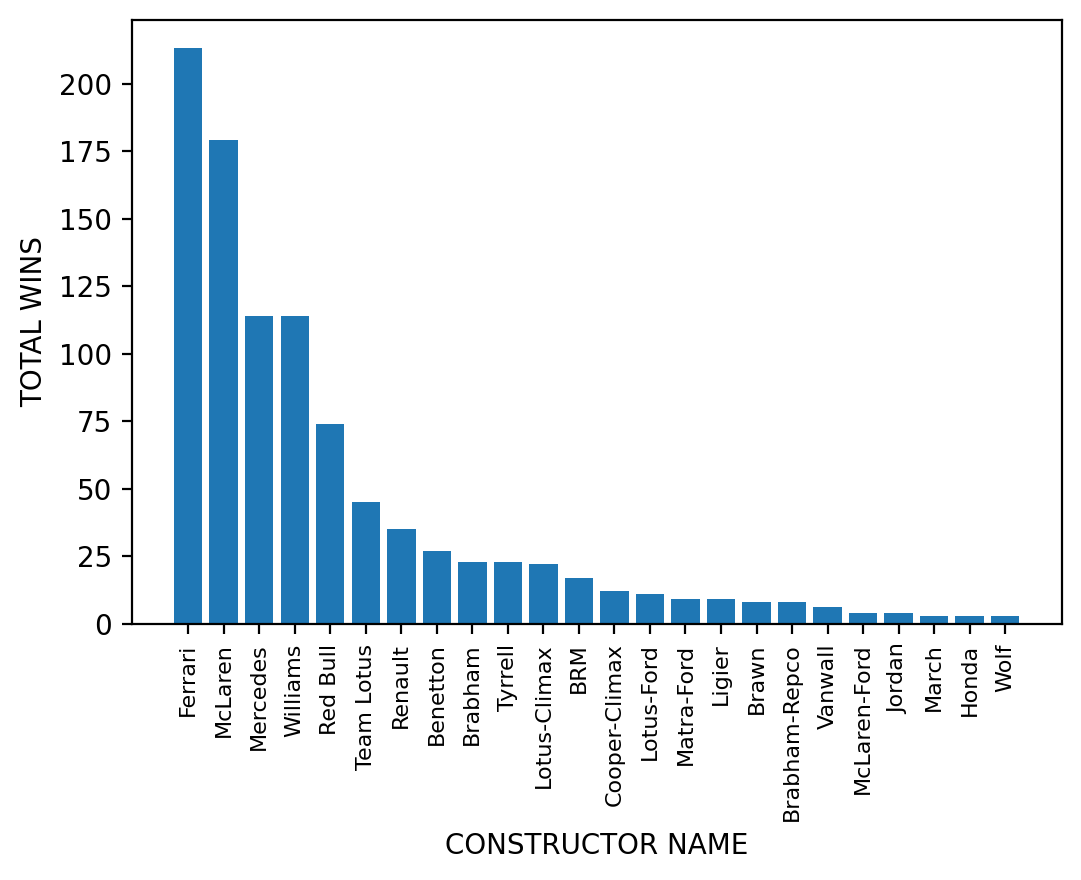

In [138]:
fig, ax = plt.subplots(dpi=200)
ax.bar(df_constructor_wins['full_name'].values, df_constructor_wins['wins'].values)
ax.set_xticklabels(df_constructor_wins['full_name'], rotation=90, fontsize=8)
ax.set_xlabel("CONSTRUCTOR NAME")
ax.set_ylabel("TOTAL WINS");
#ax.set_title("CONSTRUCTOR WINS (for teams with more than 2 wins)");

In [139]:
# <center><span style="font-family:verdana; font-size:25px">Comparing Teams</span></center>
# <p><center><span style="font-family:georgia; font-size:15px">In addition to the drivers gaining points, each constructor (team) gains points after every race too. I guess it's a way of giving them some credit for making a fast car! </span> </center></p>

# <p><center><span style="font-family:georgia; font-size:15px">Select the start and end year, and the two teams you want to compare.</span></center></p>

# <p><center><span style="font-family:georgia; font-size:15px">This graph compares the performance of teams - by total points each team gains - over a given range of years.</span></center></p>

In [140]:
# global year
# def plot_team_versus(df_constructors_results_years, team_1, team_2):
    
#     global year_1_gl
#     global year_2_gl
#     df_team_1 = df_constructors_results_years[df_constructors_results_years['constructor_name'] == team_1]
#     df_team_2 = df_constructors_results_years[df_constructors_results_years['constructor_name'] == team_2]
    
#     df_team_1 = df_team_1.groupby("year")["points"].sum()
#     df_team_2 = df_team_2.groupby("year")["points"].sum()
    
    
#     year_1 = []
#     points_1 = []
#     for k, v in df_team_1.items():
#         year_1.append(k)
#         points_1.append(v)
        
#     year_2 = []
#     points_2 = []
#     for k, v in df_team_2.items():
#         year_2.append(k)
#         points_2.append(v)
        
#     fig, ax = plt.subplots(dpi=100)
#     ax.fill_between(year_1, points_1, alpha=0.25, label=team_1)
#     ax.plot(year_1, points_1, alpha=0.25)
#     ax.fill_between(year_2, points_2, alpha=0.25, label=team_2)
#     ax.plot(year_2, points_2, alpha=0.25)
    
#     ax.set_xlabel("YEAR")
#     ax.set_ylabel("SEASON POINTS")
#     ax.set_xticklabels(list(range(year_1_gl, year_2_gl+1)), rotation=90)
    
#     ax.legend()
        

In [141]:
# # comparing teams
# global year_1_gl
# global year_2_gl
# @widgets.interact(year_1 = df_constructors_result['year'].sort_values(ascending=True).unique(),
#                  year_2 = df_constructors_result['year'].sort_values(ascending=False).unique())
# def choose_year_teams(year_1, year_2):
    
#     global year_1_gl
#     global year_2_gl
    
#     year_1_gl = year_1
#     year_2_gl = year_2
#     df_constructors_results_years = df_constructors_result[df_constructors_result['year'].isin(list(range(year_1, year_2+1)))]
    
            
#     team = interactive(plot_team_versus, df_constructors_results_years=fixed(df_constructors_results_years),
#                             team_1 = df_constructors_results_years['constructor_name'].sort_values(ascending=True).unique(),
#                             team_2 = df_constructors_results_years['constructor_name'].sort_values(ascending=False).unique())
#     display(team)